u.shape:(210, 210), s.shape:(210,), v.shape:(210, 310)
Variance Explained by Top 20 singular values:
[0.852795 0.02775  0.019128 0.014359 0.011485 0.009291 0.006148 0.005525
 0.004531 0.00434  0.003797 0.0036   0.00317  0.002679 0.002253 0.002123
 0.002079 0.001772 0.001602 0.001517]


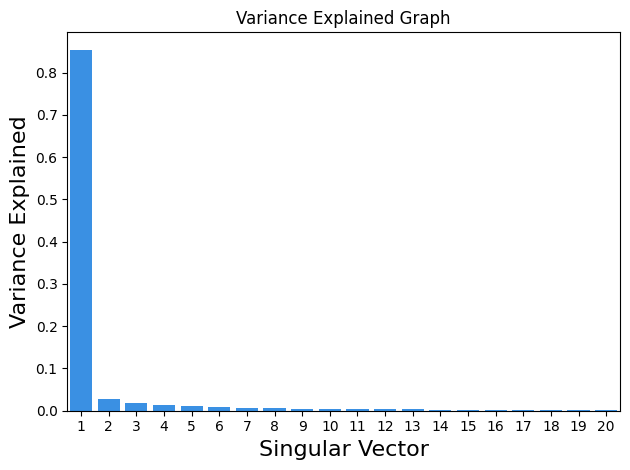

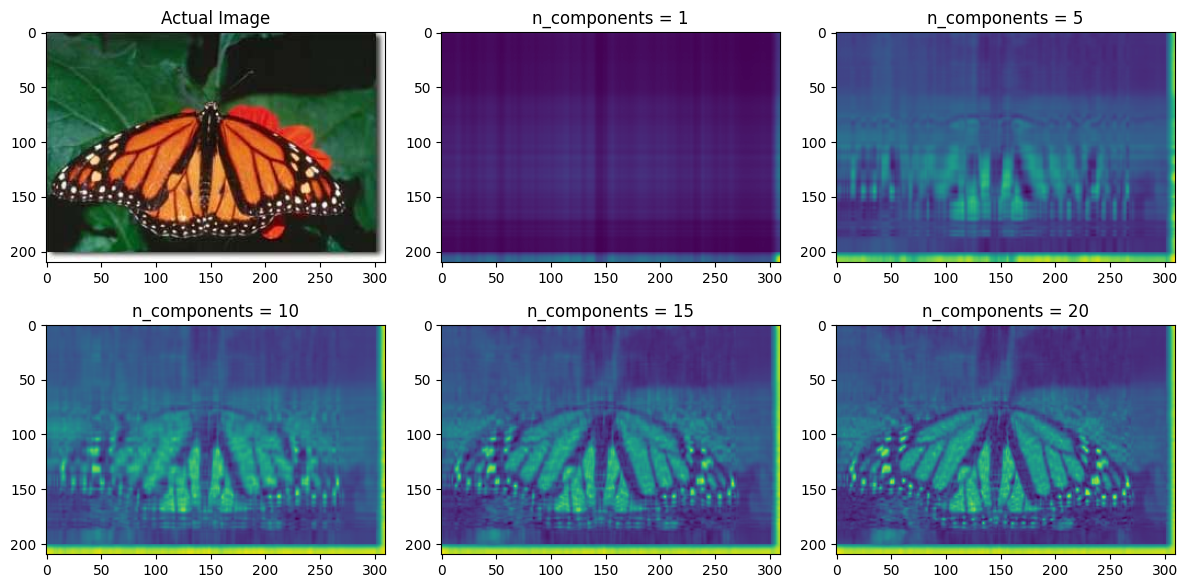

In [14]:
# import modules
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# create directory to save images
output_dir = "output_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# assign and open image
url = 'https://raw.githubusercontent.com/HilmanAmrullah/p_citra/main/gambar/monarch.jpg'
response = requests.get(url, stream=True)

if response.status_code == 200:
    with open('monarch.jpg', 'wb') as f:
        f.write(response.content)

    img = cv2.imread('monarch.jpg')

    if img is not None:
        # Convert the image from BGR to RGB format
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Converting the image into gray scale for faster computation.
        gray_image = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

        # Calculating the SVD
        u, s, v = np.linalg.svd(gray_image, full_matrices=False)

        # inspect shapes of the matrices
        print(f'u.shape:{u.shape}, s.shape:{s.shape}, v.shape:{v.shape}')

        var_explained = np.round(s**2/np.sum(s**2), decimals=6)

        # Variance explained top Singular vectors
        print(f'Variance Explained by Top 20 singular values:\n{var_explained[0:20]}')

        sns.barplot(x=list(range(1, 21)), y=var_explained[0:20], color="dodgerblue")

        plt.title('Variance Explained Graph')
        plt.xlabel('Singular Vector', fontsize=16)
        plt.ylabel('Variance Explained', fontsize=16)
        plt.tight_layout()
        plt.show()

        # plot images with different number of components
        comps = [3648, 1, 5, 10, 15, 20]
        plt.figure(figsize=(12, 6))

        for i in range(len(comps)):
            if i == 0:
                low_rank = img_rgb
            else:
                low_rank = u[:, :comps[i]] @ np.diag(s[:comps[i]]) @ v[:comps[i], :]

            plt.subplot(2, 3, i + 1)
            plt.imshow(low_rank if i != 0 else img_rgb)
            if i == 0:
                plt.title('Actual Image')
                plt.savefig(os.path.join(output_dir, 'actual_image.png'))
            else:
                plt.title(f'n_components = {comps[i]}')
                plt.savefig(os.path.join(output_dir, f'n_components_{comps[i]}.png'))

        plt.tight_layout()
        plt.show()

    else:
        print("Failed to load the image using OpenCV.")
else:
    print(f"Failed to retrieve the image. HTTP Status code: {response.status_code}")
